In [62]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

**Base de dados**

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(
    '../data/house/housing.csv', sep = ',',
    encoding = 'iso-8859-1'
)

# Exploração e tratamento dos dados #
**Atributos Previsores**

<span style="font-size: 14px; font-family: 'Trebuchet MS', sans-serif;">

- RM: é o número médio de cômodos entre os imóveis no bairro. </br>

- LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa".

- PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.
</span>

**Variável alvo**

- MEDV: valor médio das casas

## Analise de atributos e tipos ##

**Valores missing**

In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos**

In [5]:
df.shape

(2340, 4)

In [6]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [7]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,2340.000000,2340.000000,2340.000000,2.340000e+03
mean,6.335303,8.164996,17.729274,5.339491e+05
std,0.493287,5.993575,1.726801,1.493607e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,6.009000,3.740000,16.600000,4.326000e+05
50%,6.335000,5.250000,16.600000,5.250000e+05
75%,6.635000,11.280000,19.200000,6.468000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Análise dos outliers ##

**Número médio de cômodos por casa no bairro**

In [8]:
boxplot = px.box(df, y = "RM", width=600, height=400, boxmode='overlay', color_discrete_sequence=["hotpink"])
boxplot.show()

**Proprietários classe baixa no bairro**

In [9]:
boxplot = px.box(df, y = "LSTAT", width=600, height=400, boxmode='overlay', color_discrete_sequence=["royalblue"])
boxplot.show()

**Razão entre n. de alunos e professores no bairro**

In [10]:
boxplot = px.box(df, y = "PTRATIO", width=600, height=400, boxmode='overlay', color_discrete_sequence=["seagreen"])
boxplot.show()

**Valor médio das casas**

In [11]:
boxplot = px.box(df, y = "MEDV", width=600, height=400, boxmode='overlay', color_discrete_sequence=["blueviolet"])
boxplot.show()

## Gráficos de dispersão ##

**Número médio de cômodos por casa no bairro**

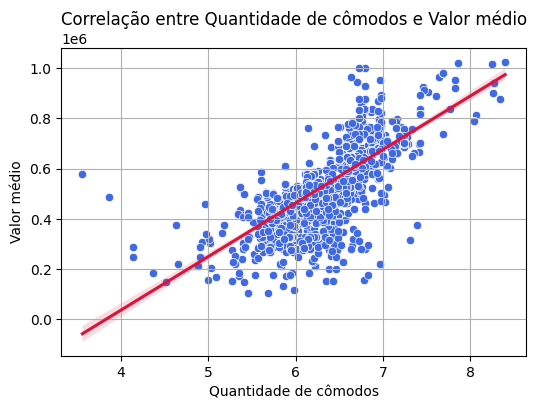

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="RM", y="MEDV", color='royalblue')

sns.regplot(data=df, x="RM", y="MEDV", scatter=False, color='crimson')

plt.title('Correlação entre Quantidade de cômodos e Valor médio')
plt.xlabel('Quantidade de cômodos')
plt.ylabel('Valor médio')
plt.grid(True)

plt.show()

**Proprietários classe baixa no bairro**

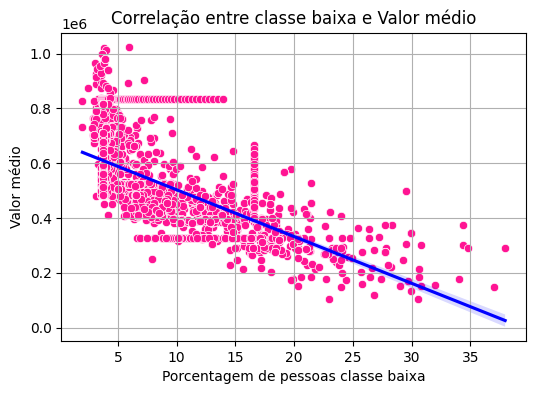

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="LSTAT", y="MEDV", color='deeppink')

sns.regplot(data=df, x="LSTAT", y="MEDV", scatter=False, color='blue')

plt.title('Correlação entre classe baixa e Valor médio')
plt.xlabel('Porcentagem de pessoas classe baixa')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

**Razão entre n. de alunos e professores no bairro**

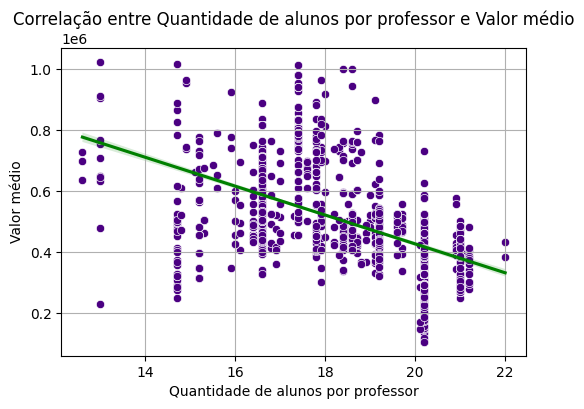

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="PTRATIO", y="MEDV", color='indigo')

sns.regplot(data=df, x="PTRATIO", y="MEDV", scatter=False, color='green')

plt.title('Correlação entre Quantidade de alunos por professor e Valor médio')
plt.xlabel('Quantidade de alunos por professor')
plt.ylabel('Valor médio')
plt.grid(True)
plt.show()

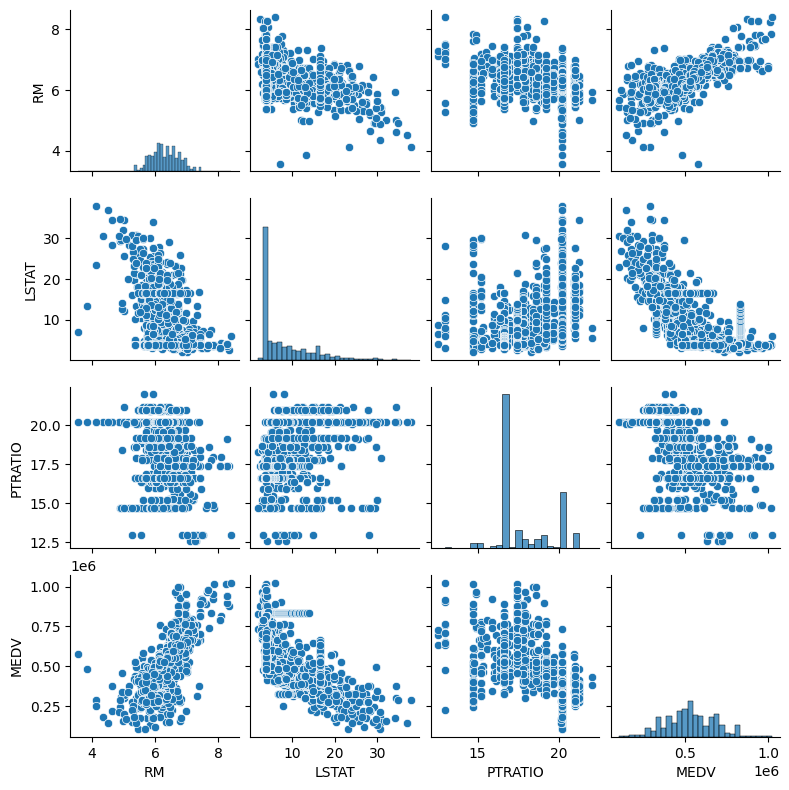

In [15]:
sns.pairplot(df, height=2);

## Análise da Normalidade ##

### Gráfico QQ-Plot ###

**Valor médio das casas no bairro**

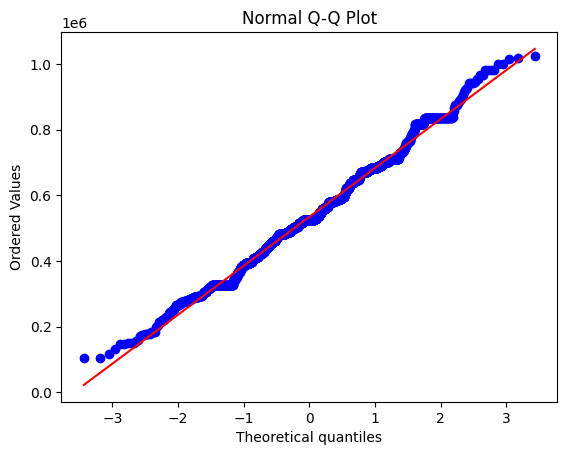

In [16]:
stats.probplot(df['MEDV'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [17]:
hist = px.histogram(df, x = "MEDV", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Média dos valores")
hist.show()

**Número médio de cômodos por casa**

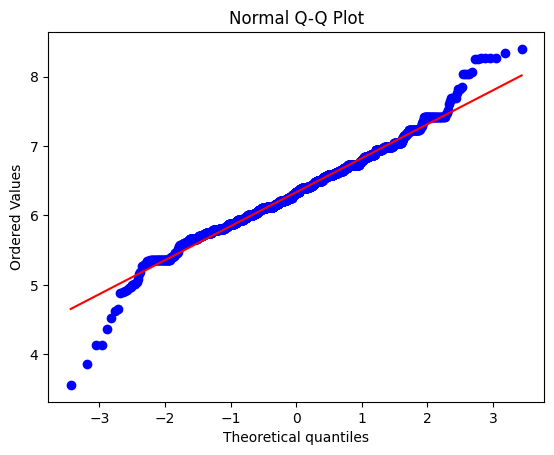

In [18]:
stats.probplot(df['RM'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [19]:
hist = px.histogram(df, x = "RM", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Cômodos por casa")
hist.show()

**Proprietários classe baixa no bairro**

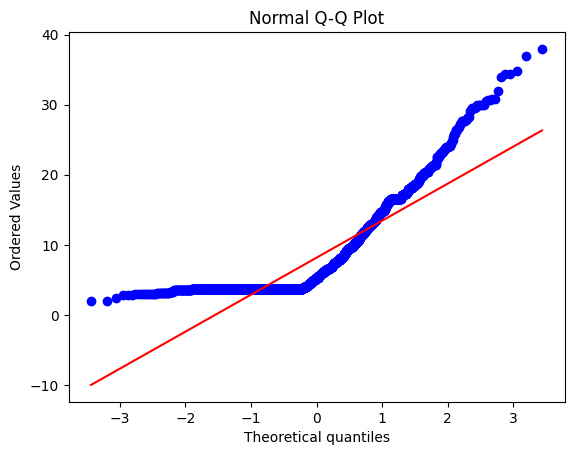

In [20]:
stats.probplot(df['LSTAT'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [21]:
hist = px.histogram(df, x = "LSTAT", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Porcentagem de pessoas classe baixa")
hist.show()

**Razão entre n. de alunos e professores no bairro**

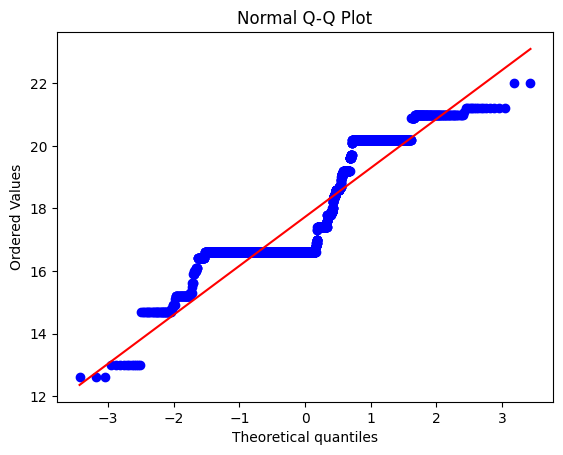

In [22]:
stats.probplot(df['PTRATIO'], dist = 'norm', plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [23]:
hist = px.histogram(df, x = "PTRATIO", nbins = 60)
hist.update_layout(width = 600, height = 400, title_text = "Quantidade de alunos por professor")
hist.show()

## Teste Estatístico ##
<span style="font-size: 14px;">

**HO = Distribuição normal:** p-valor > 0.05 </br></br>
**HA = Distribuição não normal:** p-valor < = 0.05
</span>


**MEDV**

In [24]:
estatistica, p = stats.shapiro(df.MEDV)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9928
p-valor: 2.4282e-09


In [25]:
estatistica, p = lilliefors(df.MEDV, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0585
p-valor: 1.0000e-03


**RM**

In [26]:
estatistica, p = stats.shapiro(df.RM)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.9827
p-valor: 3.0274e-16


In [27]:
estatistica, p = lilliefors(df.RM, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.0425
p-valor: 1.0000e-03


**LSTAT**

In [28]:
estatistica, p = stats.shapiro(df.LSTAT)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.7768
p-valor: 8.2119e-49


In [29]:
estatistica, p = lilliefors(df.LSTAT, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.2039
p-valor: 1.0000e-03


**PTRATIO**

In [30]:
estatistica, p = stats.shapiro(df.PTRATIO)
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.8185
p-valor: 1.7000e-45


In [31]:
estatistica, p = lilliefors(df.PTRATIO, dist = 'norm')
print("Estatística do teste: {:.4f}".format(estatistica))
print("p-valor: {:.4e}".format(p))

Estatística do teste: 0.3071
p-valor: 1.0000e-03


## Correlação Linear ##

<span style="font-size: 13px;">
<li><strong>Coeficiente de Pearson </strong> -> Distribuição normal</li> </br>
<li><strong>Coeficiente de Spearman</strong> -> Distribuição <strong>não</strong> normal</li></br>
<li><strong>Coeficiente de Kendall</strong> -> Distribuição <strong>não</strong> normal</li>
</span>

**Pearson**

In [32]:
coef, p = stats.pearsonr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.70
p-valor: 0.00e+00


**Spearman** </br>

*Iremos usá-lo*

<span style="font-size: 13px;"> 
<li>Coeficiente de correlação: 0.73 -> Uma correlação de 0.73 é considerada moderadamente forte.</li> </br>
<li>p-valor: 0.00e+00O -> p-valor gerado é muito baixo e indica que há evidências estatisticamente significativas para rejeitar a hipótese nula de que não há correlação entre as duas variáveis. 
Em outras palavras,<strong> há uma forte correlação entre as variáveis MEDV e RM.</strong> </li>
</span>

In [33]:
coef, p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.73
p-valor: 0.00e+00


**Kendall**

In [34]:
coef, p = stats.kendalltau(df.MEDV, df.RM)
print('Coeficiente de correlação: {:.2f}'.format(coef))
print('p-valor: {:.2e}'.format(p))

Coeficiente de correlação: 0.53
p-valor: 0.00e+00


In [35]:
correlacoes = df.corr(method = 'spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.347137,-0.155367,0.731275
LSTAT,-0.347137,1.000000,0.550828,-0.698332
PTRATIO,-0.155367,0.550828,1.000000,-0.489611
MEDV,0.731275,-0.698332,-0.489611,1.000000


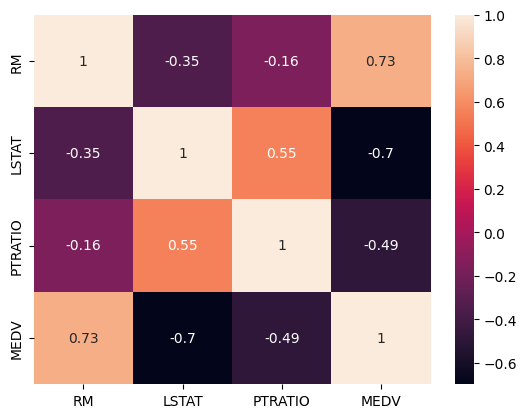

In [36]:
plt.figure()
sns.heatmap(correlacoes, annot = True);

# Regressão por Vetores de Suporte #

<span style="font-size: 13px; font-family: 'Trebuchet MS', sans-serif;">

**Introdução** </br>
O Support Vector Machine (SVM) é uma técnica poderosa utilizada tanto para classificação quanto para regressão.

**Conceitos Básicos** </br>
O SVM para regressão é uma extensão do SVM para problemas de classificação. Em vez de prever classes, o SVM de regressão prevê valores numéricos contínuos.

**Formulação do Problema** </br>
A formulação do problema de otimização para SVM de regressão envolve a minimização de uma função de perda, ao mesmo tempo que busca maximizar a margem entre os pontos de dados e a linha de regressão.

A função de perda epsilon-insensitive é comumente usada para problemas de regressão SVM. Esta função penaliza os erros maiores que um determinado limite (epsilon), enquanto não penaliza os erros menores que este limite.

**Fórmula da Função de Perda** </br>
A função de perda epsilon-insensitive é dada por:
$$[L(y, f(x)) = \max(0, |y - f(x)| - \epsilon)]$$

Onde:
- $(y)$ é o valor real,
- $(f(x))$ é a previsão do modelo,
- $(\epsilon)$ é o parâmetro de sensibilidade.

**Kernel Trick** </br>
Assim como na classificação, o SVM de regressão também pode usar o kernel trick para mapear os dados em um espaço de maior dimensionalidade, onde é mais fácil encontrar um hiperplano de separação.</br>
Os kernels mais comuns incluem o 
- **linear**
- **polinomial** 
- **gaussiano (RBF)**.

**Parâmetros do SVM de Regressão**
- **C**: Parâmetro de regularização, controla o equilíbrio entre a suavidade da fronteira de decisão e a correção dos pontos de treinamento.
- **epsilon**: Parâmetro que define a margem de tolerância para os erros de previsão.
- **Kernel**: Tipo de kernel a ser usado (linear, polinomial, RBF, etc.).

</span>

## Separação das variáveis ##

### Independente e dependente ###

In [37]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 5.727, 16.6  , 16.6  ],
       [ 6.152, 16.6  , 16.6  ],
       [ 6.289, 16.6  , 16.6  ]])

In [38]:
independente.shape

(2340, 3)

In [39]:
dependente = df.iloc[:, 3].values
dependente

array([504000., 453600., 728700., ..., 439200., 533400., 529800.])

In [40]:
dependente.shape

(2340,)

### Separação das bases de treino e teste ###

In [41]:
x_train, x_test, y_train, y_test = train_test_split(
    independente, dependente,
    test_size = 0.3, random_state = 0
)

In [42]:
x_train.shape, x_test.shape

((1638, 3), (702, 3))

## Criação do algoritmo ##

In [55]:
svr = SVR(kernel = 'poly')
svr.fit(x_train, y_train);

### Score 
<span style="font-size: 15px;">

- **Em treino** </br>
Os valores de score indicam a capacidade do modelo SVR (Support Vector Regression) de se ajustar aos dados de treinamento </br>
- **Em teste** </br> 
Os valores de score indicam a capacidade do modelo SVR de fazer previsões precisas em dados de teste. </br>

**Porque obtemos um valor tão ruim no score com o svm?** </br>
Em máquinas de vetores de suporte, seja em classificação ou regressão, é preciso realizar a `Padronização da Escala` (**escalonamento**)


</span>

**Score Treino**

In [56]:
svr.score(x_train, y_train)

0.22009465206108658

**Score Teste**

In [57]:
svr.score(x_test, y_test)

0.20332922717486812

#### Previsões sem escalonamento

In [60]:
previsoes = svr.predict(x_test)

In [61]:
mean_absolute_error(y_test, previsoes)

104699.13732388834

### Padronização da escala

#### Escalonando

In [63]:
x_scaler = StandardScaler()
x_train_scaler = x_scaler.fit_transform(x_train)

In [64]:
x_train_scaler

array([[-0.36771748, -0.00831461, -0.65853688],
       [-1.02521767,  1.42564653,  1.43870889],
       [-0.59845512, -0.08100388,  1.08916793],
       ...,
       [-0.25541154,  0.97299059,  1.43870889],
       [ 0.01820655,  0.35843582,  1.43870889],
       [ 0.70225179, -0.73520735, -0.65853688]])

In [65]:
y_scaler = StandardScaler()
y_train_scaler = y_scaler.fit_transform(y_train.reshape(-1, 1))

In [66]:
y_train_scaler

array([[-0.71030988],
       [-1.13432118],
       [-0.71030988],
       ...,
       [-1.38872795],
       [-0.95058295],
       [ 0.36789028]])

In [67]:
x_test_scaler = x_scaler.transform(x_test)
x_test_scaler

array([[ 0.32857931, -0.73520735, -0.65853688],
       [-0.75159958,  0.32043915,  0.85614062],
       [-0.67400639,  1.47190334, -1.47413245],
       ...,
       [-0.25132769, -0.12395663,  0.09880187],
       [ 0.12438671, -0.73520735, -0.65853688],
       [-0.29625006,  1.58093725,  1.43870889]])

In [68]:
y_test_scaler = y_scaler.transform(y_test.reshape(-1, 1))

In [69]:
y_test_scaler

array([[ 0.6869083 ],
       [-0.10256035],
       [-0.92231553],
       [-0.44176939],
       [-0.18736261],
       [-0.11669406],
       [ 0.50518917],
       [-0.06015922],
       [ 2.02153433],
       [-2.57595959],
       [ 0.6869083 ],
       [-0.30043229],
       [ 0.21040036],
       [-0.8799144 ],
       [ 0.95948699],
       [-1.38872795],
       [ 0.63441166],
       [-0.65377504],
       [-0.06015922],
       [-0.19947722],
       [ 1.19168365],
       [-0.68204246],
       [ 0.02464303],
       [ 1.05438476],
       [-0.32869971],
       [ 0.87266563],
       [-0.99298408],
       [ 1.13111061],
       [ 0.07713967],
       [-1.62900102],
       [-0.35090983],
       [-2.40635507],
       [ 0.99784992],
       [ 0.6869083 ],
       [ 1.01602183],
       [ 3.00685582],
       [ 2.59697824],
       [-0.21764913],
       [-0.34283342],
       [ 0.33154645],
       [ 1.18764545],
       [-1.38872795],
       [-0.95058295],
       [-0.06015922],
       [-0.06015922],
       [ 0

#### Treinamento Escalonado 

In [81]:
svr2 = SVR(kernel = 'rbf')
svr2.fit(x_train_scaler, y_train_scaler.ravel());

##### Score de treino

In [82]:
svr2.score(x_train_scaler, y_train_scaler)

0.8559847123999293

##### Score de teste

In [83]:
svr2.score(x_test_scaler, y_test_scaler)

0.8429656330838761

In [84]:
previsoes_test = svr2.predict(x_test_scaler)
previsoes_test

array([ 6.99810591e-01, -8.47054760e-01, -6.51633840e-01, -1.83280278e-01,
       -2.61791373e-01, -1.93581918e-02,  5.74719555e-01, -4.75954044e-01,
        8.51644138e-01, -1.60316850e+00,  6.99810591e-01, -6.30016391e-01,
        7.98366245e-02, -5.63994565e-01,  1.05957953e+00, -1.15544455e+00,
        7.98916186e-01, -7.34722873e-01, -4.29879314e-01, -2.54302942e-01,
        1.10606210e+00, -7.55852573e-01, -2.10186931e-01,  8.02630559e-01,
        1.22241983e-01,  5.38974979e-01, -9.02896936e-01,  1.37641709e+00,
        9.73121946e-02, -1.43984440e+00, -2.50603456e-01, -1.68713888e+00,
        8.39912990e-01,  6.99810591e-01,  7.31579173e-01,  2.13832482e+00,
        1.87866627e+00, -2.30150716e-01, -7.93841207e-01,  9.25414493e-01,
        6.92915998e-01, -1.46635999e+00, -8.94333753e-01, -1.49356313e-01,
       -1.32251486e-01,  8.57190504e-01,  8.39912990e-01, -3.95388049e-01,
        8.91886449e-01, -1.69727585e+00,  1.97156129e+00, -7.27956606e-01,
       -7.14601950e-01, -

#### Revertendo a transformação

In [85]:
y_test_inverse = y_scaler.inverse_transform(y_test_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_test.reshape(-1, 1))

In [86]:
y_test_inverse

array([[ 636000. ],
       [ 518700. ],
       [ 396900. ],
       [ 468300. ],
       [ 506100. ],
       [ 516600. ],
       [ 609000. ],
       [ 525000. ],
       [ 834300. ],
       [ 151200. ],
       [ 636000. ],
       [ 489300. ],
       [ 565200. ],
       [ 403200. ],
       [ 676500. ],
       [ 327600. ],
       [ 628200. ],
       [ 436800. ],
       [ 525000. ],
       [ 504300. ],
       [ 711000. ],
       [ 432600. ],
       [ 537600. ],
       [ 690600. ],
       [ 485100. ],
       [ 663600. ],
       [ 386400. ],
       [ 702000. ],
       [ 545400. ],
       [ 291900. ],
       [ 481800. ],
       [ 176400. ],
       [ 682200. ],
       [ 636000. ],
       [ 684900. ],
       [ 980700. ],
       [ 919800. ],
       [ 501600. ],
       [ 483000. ],
       [ 583200. ],
       [ 710400. ],
       [ 327600. ],
       [ 392700. ],
       [ 525000. ],
       [ 525000. ],
       [ 646800. ],
       [ 682200. ],
       [ 462000. ],
       [ 588600. ],
       [ 157500. ],


In [87]:
previsoes_inverse

array([[637917.03488897],
       [408082.31618332],
       [437118.14144486],
       [506706.55729236],
       [495041.30445544],
       [531062.25605851],
       [619330.89032206],
       [463220.81197381],
       [660476.60703053],
       [295738.22079041],
       [637917.03488897],
       [440330.08254839],
       [545800.71579674],
       [450139.66797718],
       [691371.84446893],
       [362261.46949847],
       [652642.23801436],
       [424772.69435792],
       [470066.63901123],
       [496153.94258579],
       [698278.26914178],
       [421633.22345791],
       [502708.74131097],
       [653194.12306833],
       [552101.34417633],
       [614019.92733889],
       [399785.23270095],
       [738447.86884359],
       [548397.2525576 ],
       [320005.07037494],
       [496703.61571314],
       [283261.82258915],
       [658733.58191298],
       [637917.03488897],
       [642637.24078965],
       [851652.84089217],
       [813072.52855737],
       [499742.50326077],
       [4159

In [88]:
mean_absolute_error(y_test_inverse, previsoes_inverse)

40637.34934306818

In [89]:
mean_squared_error(y_test_inverse, previsoes_inverse)

3583354428.1828594

In [90]:
np.sqrt(mean_squared_error(y_test_inverse, previsoes_inverse))

59861.126185387286

## Cross Validation

In [91]:
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [92]:
independente_scaler

array([[ 0.48602186, -0.53151522, -1.4071067 ],
       [ 0.17376362,  0.16270967,  0.04096687],
       [ 1.72288892, -0.69005216,  0.04096687],
       ...,
       [-1.23342612,  1.40764182, -0.65410845],
       [-0.37167448,  1.40764182, -0.65410845],
       [-0.0938863 ,  1.40764182, -0.65410845]])

In [93]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1, 1))

### KFold

In [97]:
kfold = KFold(
    n_splits = 15, shuffle = True, random_state = 5 
)

In [98]:
modelo = SVR(kernel = 'rbf')
resultado = cross_val_score(
    modelo, independente_scaler,
    dependente_scaler.ravel(), cv = kfold
)
resultado

array([0.84900968, 0.81637056, 0.83404343, 0.8274467 , 0.75463206,
       0.84311284, 0.84803526, 0.87875469, 0.86054767, 0.87672961,
       0.86016573, 0.87866928, 0.81302299, 0.88249709, 0.84282212])

In [99]:
print("Acurácia média: %.2f%%" % (resultado.mean() * 100.0))

Acurácia média: 84.44%
